In [32]:
import pandas as pd
import numpy as np
import os
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, Dropout, Flatten, MaxPool2D
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
data = 'data/'

In [10]:
labels = os.listdir(data)
labels

['cloudy', 'green_area', 'water', 'desert']

In [11]:
for label in labels:
    print(label, len(os.listdir(data+'/'+label)))

cloudy 1501
green_area 1500
water 1500
desert 1131


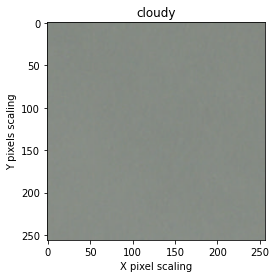

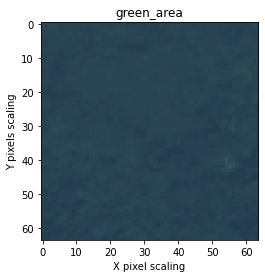

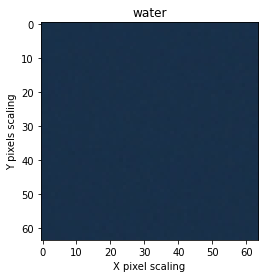

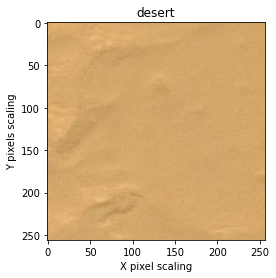

In [12]:
for label in labels:
    path = os.listdir(data + '/' + label)
    img = data + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [13]:
# image augmentation such as random rotation, shifts, shear and flips for data generator for train and test

In [14]:
datagen = ImageDataGenerator(
        samplewise_center=True, 
        horizontal_flip=True,  
        vertical_flip=False,
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        rescale=1./255,
        validation_split=0.2) 

train=datagen.flow_from_directory(data,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')

test=datagen.flow_from_directory(data,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4509 images belonging to 4 classes.
Found 1127 images belonging to 4 classes.


Found 5636 images belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

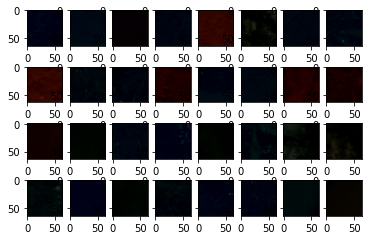

In [15]:
img_iter = datagen.flow_from_directory(data,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [16]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

2023-01-06 15:57:48.528627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-06 15:57:48.528663: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-06 15:57:48.528686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linux): /proc/driver/nvidia/version does not exist
2023-01-06 15:57:48.528938: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(train,
                    validation_data=test,
                    epochs=20, 
                    callbacks=[callback])

Epoch 1/20
141/141 [==============================] - 33s 229ms/step - loss: 1.0645 - accuracy: 0.7627 - val_loss: 2.4567 - val_accuracy: 0.2272
Epoch 2/20
141/141 [==============================] - 32s 224ms/step - loss: 0.4855 - accuracy: 0.8718 - val_loss: 3.7024 - val_accuracy: 0.2059
Epoch 3/20
141/141 [==============================] - 32s 226ms/step - loss: 0.3536 - accuracy: 0.9049 - val_loss: 2.5086 - val_accuracy: 0.3815
Epoch 4/20
141/141 [==============================] - 32s 229ms/step - loss: 0.2982 - accuracy: 0.9268 - val_loss: 1.1374 - val_accuracy: 0.5421
Epoch 5/20
141/141 [==============================] - 32s 225ms/step - loss: 0.2730 - accuracy: 0.9268 - val_loss: 1.3499 - val_accuracy: 0.7090
Epoch 6/20
141/141 [==============================] - 32s 223ms/step - loss: 0.1942 - accuracy: 0.9399 - val_loss: 0.2671 - val_accuracy: 0.9015
Epoch 7/20
141/141 [==============================] - 31s 223ms/step - loss: 0.2122 - accuracy: 0.9446 - val_loss: 0.8291 - val_ac

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


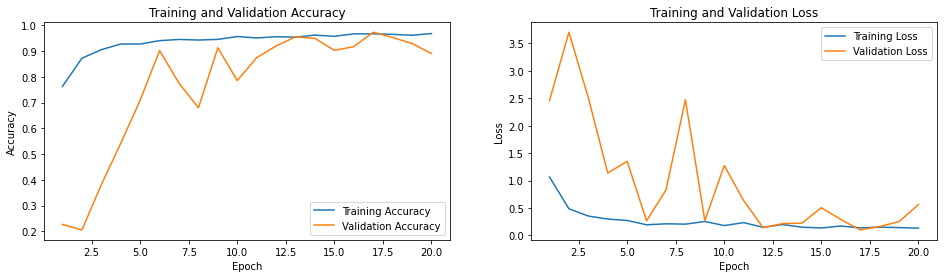

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
score = model.evaluate(test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1127/1127 [==============================] - 4s 4ms/step - loss: 0.5153 - accuracy: 0.8855
Test loss: 0.515337347984314
Test accuracy: 0.8855368494987488


In [22]:
predict=model.predict(test)
y_classes = predict.argmax(axis=-1)
y_classes

array([0, 0, 0, ..., 3, 3, 3])

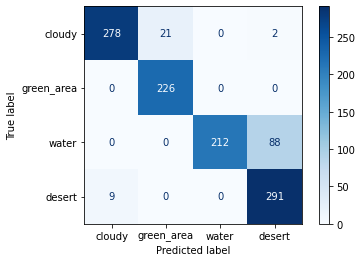

In [23]:
cm = confusion_matrix(test.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show();

In [54]:
print(classification_report(test.classes, y_classes))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       301
           1       0.91      1.00      0.96       226
           2       1.00      0.71      0.83       300
           3       0.76      0.97      0.85       300

    accuracy                           0.89      1127
   macro avg       0.91      0.90      0.90      1127
weighted avg       0.91      0.89      0.89      1127



In [59]:
model.save('satellite_image.h5')